# Latar Belakang
Airbnb adalah jaringan pasar daring dan penginapan rumahan sejawat yang memungkinkan pengguna mendaftarkan atau menyewa properti untuk digunakan dalam jangka pendek. Harga sewanya ditetapkan oleh pemilik properti. Melalui analisa harga properti Airbnb di Bangkok menjadi wawasan bagi pemilik properti dalam menentukan harga yang kompetitif, memahami kebutuhan pasar, serta merancang strategi yang lebih efektif dalam pengelolaan properti untuk meningkatkan pendapatan penyewaan properti Airbnb di Bangkok

# Pernyataan Masalah
Pemilik properti Ingin **meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok**. 

Sebagai seorang data scientist, saya akan menjawab pertanyaan berikut:

**Bagaimana meningkatkan pendapatan dan daya tarik properti Airbnb di Bangkok?**

## Analisis yang Diperlukan

- **Analisis Harga Properti Berdasarkan Lokasi**:

Mengidentifikasi lokasi-lokasi dengan harga properti tinggi dan rendah untuk menyesuaikan harga secara cerdas.
- **Harga terhadap tipe kamar**:

Memahami perbedaan harga antar jenis kamar untuk menawarkan diversifikasi yang lebih baik kepada calon penyewa.

- **Jumlah Tipe Kamar berdasarkan daerah**:

Untuk memahami macam tipe kamar yang banyak dibangun pada daerah tertentu

- **Jumlah ulasan pada tipe kamar dan listing/tempat**

Mengetahui faktor-faktor yang paling memengaruhi jumlah ulasan untuk meningkatkan popularitas properti.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.rcParams.update({'font.size': 12}) # must set in top

# Data Understanding

## Load Dataset

In [2]:
# Melakukan import Library
import pandas as pd

df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


## Data Information

## Menampilkan Informasi Terkait DataFrame

In [3]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [4]:
print('Melihat jumlah baris dan kolom di dataset Airbnb')
print(f'baris di dataset = {df.shape[0]}')
print(f'kolom di dataset = {df.shape[1]}')
print('Melihat kolom yang ada pada dataset')
df.info()

Melihat jumlah baris dan kolom di dataset Airbnb
baris di dataset = 15854
kolom di dataset = 17
Melihat kolom yang ada pada dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights        

Berikut ini penjelasan kolom-kolom yang ada pada dataset



| Nama Kolom                           | Deskripsi                                                                                                                                              |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unnamed: 0                           | Index dari dataset                                                                                                                                     |
| id                                   | Primary key untuk baris tempat tersebut.                                                                                                              |
| name                                 | Nama dari listing.                                                                                                                                     |
| host_id                              | Primary key untuk pemilik/tuan rumah.                                                                                                     |
| host_name                            | Nama tuan rumah/host                                                                                                         |
| neighborhood                         | Nama daerah yang ada di kota Bangkok                                                                             |
| Latitude                             | Garis untuk koordinat lintang.                                                                              |
| Longitude                            | Garis untuk koordinat bujur.                                                                                |
| room_type                            | Tipe ruangan ('Entire home/apt', 'Private room', 'Hotel room', 'Shared room')                                                 |
| price                                | Harga sewa                                                                                                     |
| minimum_nights                       | Jumlah minimum masa sewa permalam.                                                                          |
| number_of_reviews                    | Jumlah ulasan yang dimiliki tempat sewa.                                                                                                                     |
| last_review                          | Tanggal terakhir ulasan.                                                                                                                         |
| reviews_per_month                    | Jumlah rata-rata ulasan setiap bulan.                                                                     |
| calculated_host_listings_count       | Jumlah tempat yang dimiliki pemilik.                                                                  |
| available_365                        | Ketersediaan tempat selama 365 hari ke depan.                                                                                                            |
| number_of_reviews_ltm                | Jumlah ulasan yang dimiliki tempat selama 12 bulan terakhir.                                                                                           |


# Data Cleaning

## Menangani missing value

In [5]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Unnamed: 0                         0.000000
id                                 0.000000
name                               0.050460
host_id                            0.000000
host_name                          0.006308
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.520752
reviews_per_month                 36.520752
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

berdasarkan proporsi missing value diatas

- Missing Value:
  - kurang dari 10%
    - *name* : 5.04%
    - *host_name* : 0.6%
  - lebih dari 10%
    - *last_review* : 36.52%
    - *reviews_per_month* : 36.52%


**Menangani missing value pada dataset**

Pada dataset ini kita akan melakukan dua penanganan yaitu mengisi data dan menghapus baris.
pada pengisian data kita akan mengisi secara domain knowledge dan secara statistik menggunakan median (numerik) atau modus (untuk kolom kategori).

### Menangani duplikasi value pada kolom **Unnamed: 0**

Dilakukan penghapusan kolom *Unamed: 0* karena memiliki nilai yang sama pada index dataset

In [7]:
df.drop(columns="Unnamed: 0", inplace=True)
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Menangani Missing Value pada kolom **name**

In [8]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


dilakukan pengecekan dengan menambahkan kondisi *calculated_host_listings_count* lebih dari 1, karena jika pada baris memiliki *calculated_host_listings_count* lebih dari 1 artinya terdapat baris lain yang serupa dengan host_id yang sama

In [9]:
df[df['name'].isna() & (df['calculated_host_listings_count'] > 1)]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


dilakukan pengecekan *host_id* dengan nilai *73275200* untuk memastikan apakah ada baris lain yang serupa

In [10]:
df[df['host_id']==73275200]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


dapat dilihat pada tabel diatas terdapat baris yang serupa dengan bujur, lintang, dan harga yang berbeda tetapi memiliki nilai *name* yang sama. Maka kita dapat mengisi missing value pada kolom *name* dengan nilai yang sama berdasarkan baris lain yang serupa

In [11]:
df.loc[2075, 'name'] = "Errday Guest House"

In [12]:
df[df['host_id']==73275200]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1981,13400326,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72427,100.56443,Private room,950,1,1,2020-02-19,0.03,3,1,0
1982,13400758,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72373,100.56415,Private room,36363,1,0,NaN,NaN,3,1,0
2075,13142743,Errday Guest House,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [13]:
df[df['name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0


karena missing value pada kolom *name* lainnya memiliki nilai *calculated_host_listings_count* nya 1, maka tidak dapat melakukan pengisian berdasarkan baris yang serupa dan proporsi missing value nya kurang dari 10%, sehingga dapat dilakukan penghapusan pada 7 missing value kolom *name*.

In [14]:
# Menghapus baris dari ke 7 data missing value
df = df.dropna(subset=['name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Menangani Missing Value pada kolom **host_name**

In [15]:
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


terdapat 1 baris missing value pada kolom *host_name* dan tidak dapat melakukan pengisian berdasarkan kolom maka kita dapat melakukan penghapusan pada baris tersebut

In [16]:
# Menghapus nilai kosong pada kolom 'host_name'
df = df.dropna(subset=['host_name'])
df.isna().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5784
reviews_per_month                 5784
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

### Menangani missing value pada kolom **last_review**

In [17]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,NaN,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,NaN,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


karena kolom *last_review* data type nya masih berupa *object*, kita perlu ubah dulu data type nya ke data type datetime karena mayoritas data yang terisi berupa tanggal.

In [18]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the dtype after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15846 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15846 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15846 non-null  int64         
 3   host_name                       15846 non-null  object        
 4   neighbourhood                   15846 non-null  object        
 5   latitude                        15846 non-null  float64       
 6   longitude                       15846 non-null  float64       
 7   room_type                       15846 non-null  object        
 8   price                           15846 non-null  int64         
 9   minimum_nights                  15846 non-null  int64         
 10  number_of_reviews               15846 non-null  int64         
 11  last_re

In [19]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       36.501325
reviews_per_month                 36.501325
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

karena proporsi missing value melebihi 10%, maka kita perlu melakukan pengisian data agar tidak merubah integritas data. pengisian data ini menggunakan nilai dengan tanggal-bulan-tahun berupa 0 mengikuti format tanggal pada data type datetime dan memilih 0-0-0000 karena kemungkinan user lupa memberikan tanggal saat membuat ulasan.

In [20]:
df['last_review'].fillna('0-0-0000', inplace= True)

/var/folders/zt/mhtdtw4n2l16fvmxkb0zhs400000gn/T/ipykernel_63563/4208757790.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0-0-0000' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['last_review'].fillna('0-0-0000', inplace= True)


### Menangani missing value pada kolom **reviews_per_month**

In [21]:
df[df['reviews_per_month'].isna()]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,NaN,1,365,0
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,NaN,3,365,0
7,1738669,1 chic bedroom apartment in BKK,7045870,Jiraporn,Chatu Chak,13.829250,100.567370,Entire home/apt,1461,1,0,0-0-0000,NaN,1,365,0
14,959254,"Deluxe Condo, Nana, Pool/GYM/Sauna",5153476,Natcha,Khlong Toei,13.715160,100.568060,Entire home/apt,1400,30,0,0-0-0000,NaN,1,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,NaN,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,NaN,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,NaN,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,NaN,14,365,0


In [22]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                        0.000000
reviews_per_month                 36.501325
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

karena kolom *reviews_per_month* merupakan rata-rata *last_review* perbulan, sedangkan *last_review* memiliki nilai 0-0-0000 dan proporsi missing value melebihi 10%, maka perlu dilakukan pengisian data. pengisian data dengan nilai 0 yang mewakili rata-rata dari *last_review* yang kemungkinan lupa mengisi tanggal

In [23]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

### **Penanganan missing value secara keseluruhan**

**Pengisian**

- Penanganan pada kolom ***last_review*** dan ***reviews_per_month***:
Karena missing value melebihi 10% maka perlu diisi datanya dengan tanggal kosong `0-0-0000` untuk kolom ***last_review*** dan rata-rata nya 0 untuk kolom ***reviews_per_month***.

**Penghapusan data**

- Drop column pada kolom ***unnamed: 0*** dilakukan karena memiliki nilai yang sama dengan `index` dataframe

- Mengisi kolom name berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name*** karena jika ***calculated_host_listings_count*** memiliki nilai lebih dari 1 maka seharusnya terdapat baris dengan ***host_name*** yang memiliki nilai ***Pakaphol*** mempunyai lebih dari 1 baris dengan kolom ***name*** yang sama yaitu `Errday Guest House`. Jika ***calculated_host_listings_count*** memiliki nilai 1 akan kita drop karena tidak dapat diisi berdasarkan kolom ***calculated_host_listings_count*** dan ***host_name***.  
- Baris pada kolom ***host_name*** dilakukan penghapusan karena tidak dapat diisi berdasarkan baris/kolom manapun

## Check Duplicate

In [24]:
df.duplicated().sum()

0

setelah dilakukan pengecekan duplikasi data, ternyata tidak ada duplikasi data sehingga tidak perlu melakukan penanganan duplikasi data

In [25]:
df.to_csv("Airbnb Listings Bangkok_cleaned_automate.csv")

# Data Visualization

Tahap visualisasi untuk menganalisa pernyataan masalah

## Analisis Harga Properti Berdasarkan Lokasi:

In [26]:
# Analisis Harga Properti Berdasarkan Lokasi (Neighbourhood)
neighbourhood_price = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

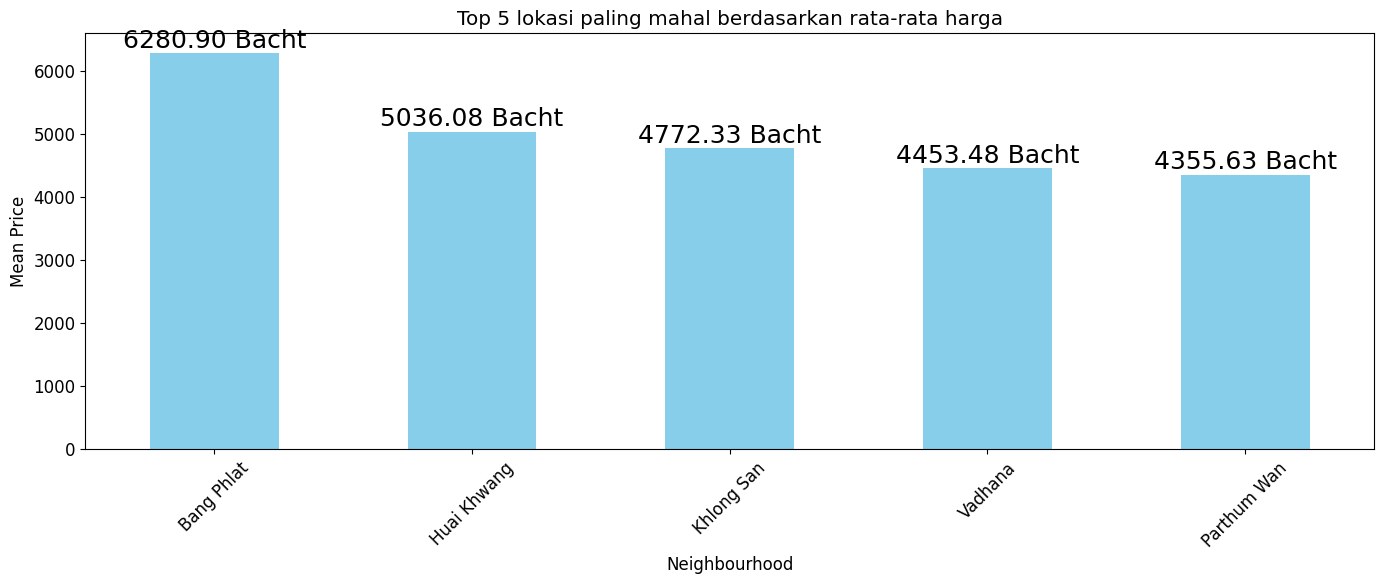

In [27]:
top_5_neighbourhoods = neighbourhood_price.head(5)

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(14, 6))
plot=top_5_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 lokasi paling mahal berdasarkan rata-rata harga')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_neighbourhoods):
    plot.text(i, v + 10, f'{v:.2f} Bacht', ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

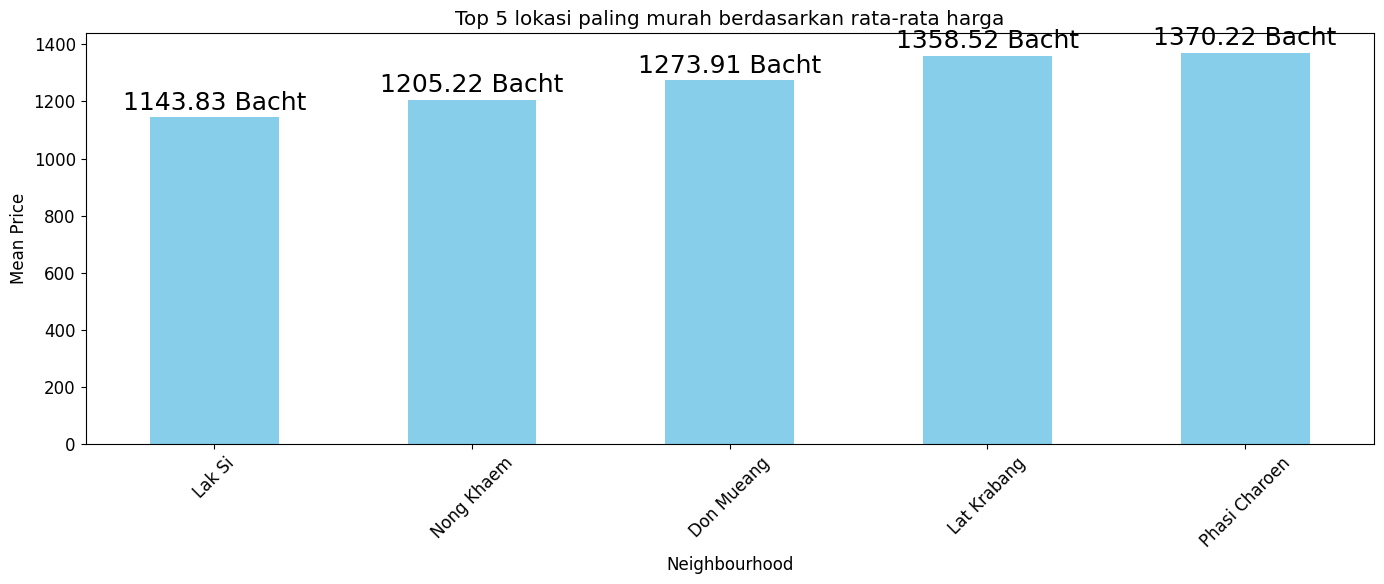

In [28]:
top_5_neighbourhoods = neighbourhood_price.tail(5).sort_values(ascending=True)

# Visualisasi 5 Neighbourhoods teratas berdasarkan Median Price
plt.figure(figsize=(14, 6))
plot=top_5_neighbourhoods.plot(kind='bar', color='skyblue')
plt.title('Top 5 lokasi paling murah berdasarkan rata-rata harga')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_neighbourhoods):
    plot.text(i, v + 10, f'{v:.2f} Bacht', ha='center', va='bottom', fontsize=18)
plt.tight_layout()
plt.show()

### Insight

Terdapat variasi harga yang signifikan antar lokasi di Bangkok. 


5 paling mahal berada di dekat pusat kota bangkok yaitu:
1. Bang Phlat
2. Huai Khwang
3. Khlong San
4. Vadhana
5. Parthum Wan

5 paling murah berada di sekitar perbatasan kota bangkok dan jauh dari pusat kota bangkok:
1. Lak Si 
2. 2.Nong Khaem 
3. Don Mueang 
4. Lat Krabang 
5. Phasi Charoen


Informasi ini dapat membantu dalam mengidentifikasi daerah-daerah premium yang menawarkan harga properti lebih tinggi.

## Analisis Harga terhadap tipe kamar:

In [29]:
roomtype_price = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

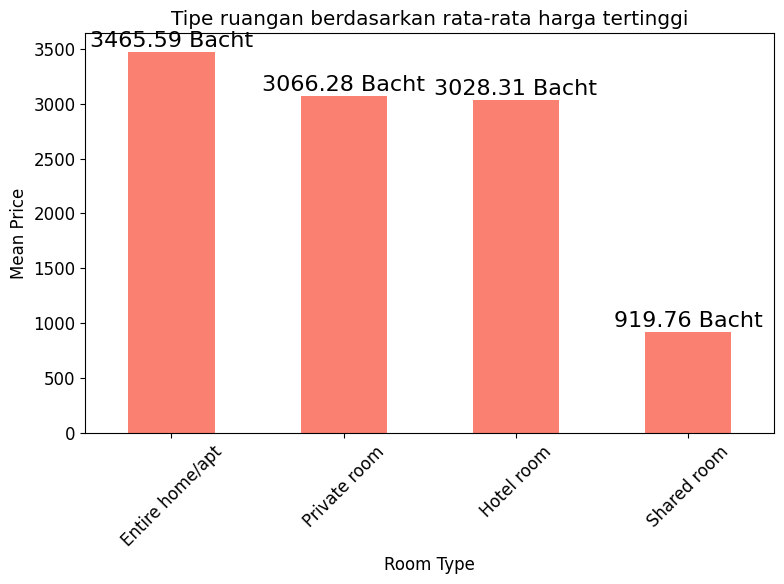

In [30]:
# Analisis Pengaruh Tipe Kamar terhadap Harga
top_5_roomtypes = roomtype_price.head(5)

# Visualisasi 5 Room Types teratas berdasarkan Median Price
plt.figure(figsize=(8, 6))
plot=top_5_roomtypes.plot(kind='bar', color='salmon')
plt.title('Tipe ruangan berdasarkan rata-rata harga tertinggi')
plt.xlabel('Room Type')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
# Anotasi harga pada setiap bar
for i, v in enumerate(top_5_roomtypes):
    plot.text(i, v + 10, f'{v:.2f} Bacht', ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()

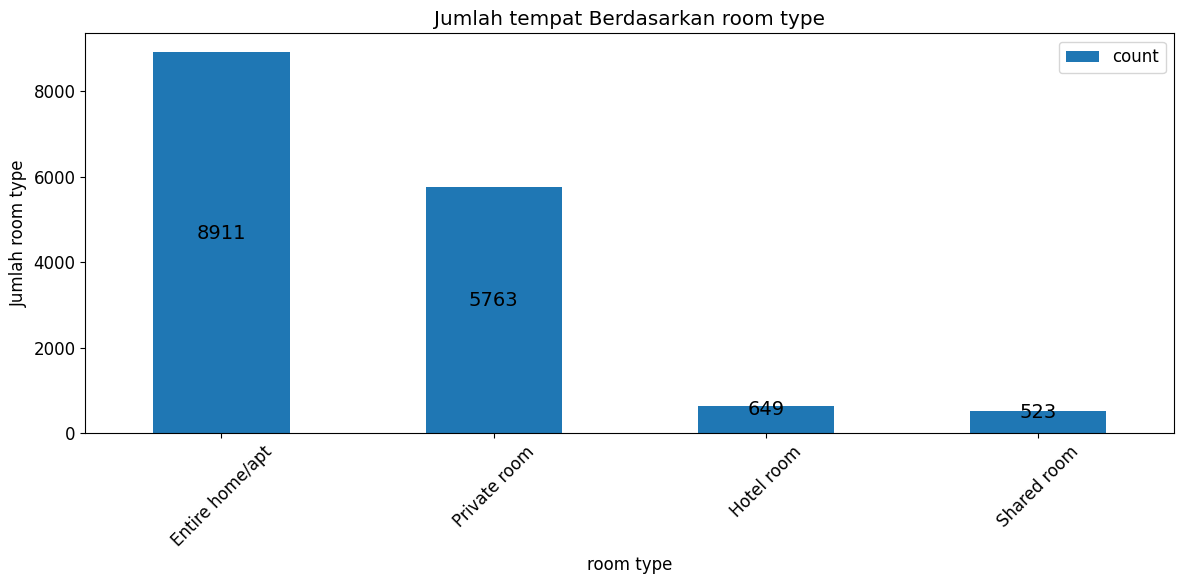

In [31]:
# Menghitung Jumlah listing Berdasarkan room_type nya
df_room_type_count = pd.DataFrame(df[['room_type']].value_counts()).reset_index()
df_room_type_count.sort_values(by='count', ascending=False, inplace=True)
plot = df_room_type_count.plot(kind='bar', x='room_type', figsize=(12, 6))
plt.title('Jumlah tempat Berdasarkan room type')
plt.xlabel('room type')
plt.ylabel('Jumlah room type')
plt.xticks(rotation=45)
# Menambahkan anotasi jumlah listings di setiap bar
for i, row in df_room_type_count.iterrows():
    plot.text(i, row['count'] / 2 , str(row['count']), ha='center', va='bottom', fontsize=14)
plt.tight_layout()
plt.show()

### Insight

  - Berdasarkan tipe kamar, Entire home/apt memiliki rata-rata harga tertinggi dikarenakan terdapat banyak tempat yang memiliki tipe kamar kamar tersebut, sedangkan shared room merupakan tipe kamar dengan rata-rata harga terendah dan memiliki jumlah yang sedikit di Kota Bangkok
  - Analisis ini juga dapat membantu memahami preferensi pengunjung atau pelanggan tertentu terhadap tipe kamar dan seberapa jauh mereka bersedia membayar untuk berbagai tipe akomodasi.

## Analisis Jumlah listings/tempat setiap daerah

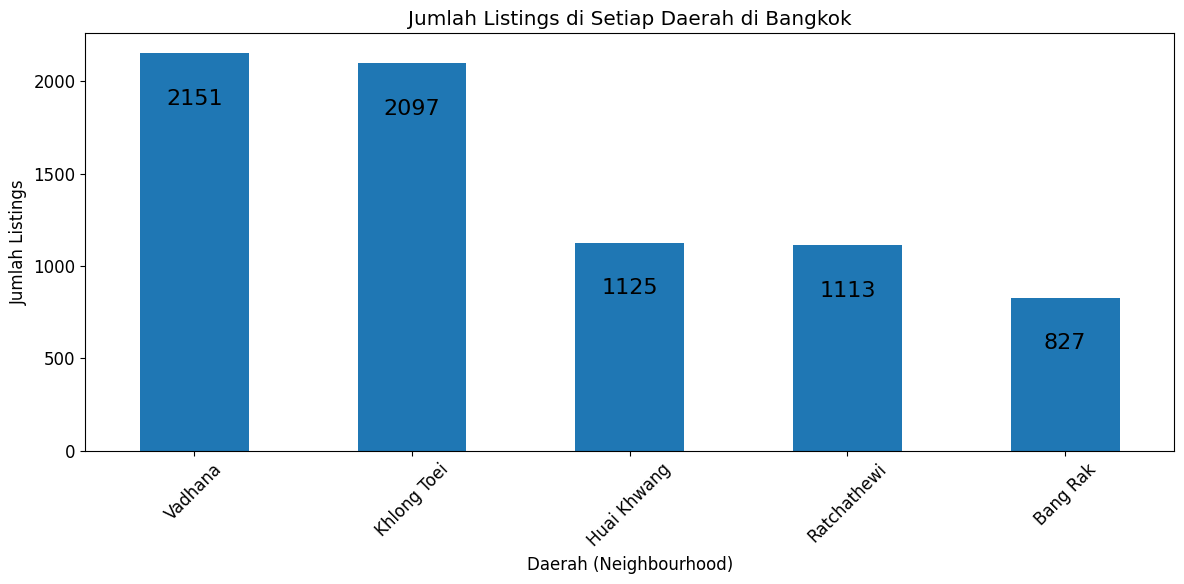

In [32]:
# Menghitung jumlah listings di setiap daerah
listings_per_neighbourhood = df['neighbourhood'].value_counts().sort_values(ascending=False).head(5)

# Menampilkan bar plot jumlah listings di setiap daerah
plt.figure(figsize=(12, 6))
listings_per_neighbourhood.plot(kind='bar')
plt.title('Jumlah Listings di Setiap Daerah di Bangkok')
plt.xlabel('Daerah (Neighbourhood)')
plt.ylabel('Jumlah Listings')
plt.xticks(rotation=45)
# Menambahkan anotasi jumlah listings di setiap bar
for i, v in enumerate(listings_per_neighbourhood):
    plt.text(i, v - 300, str(v), ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()

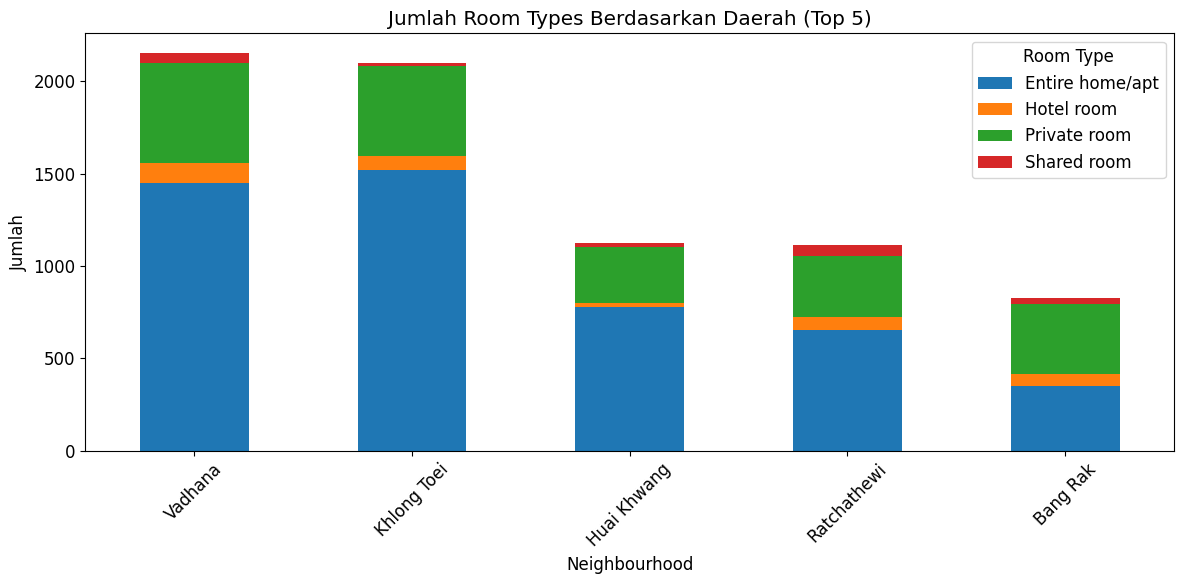

In [33]:
# Membuat tabel silang (crosstab) antara 'neighbourhood' dan 'room_type'
room_types_by_neighbourhood = pd.crosstab(df['neighbourhood'], df['room_type'])

# Menambahkan kolom untuk total room types per daerah
room_types_by_neighbourhood['Total'] = room_types_by_neighbourhood.sum(axis=1)

# Mengurutkan berdasarkan room types terbanyak
room_types_by_neighbourhood_sorted = room_types_by_neighbourhood.sort_values(by='Total', ascending=False)

# Mengambil 5 daerah dengan jumlah room types terbanyak untuk divisualisasikan
top_5_room_types = room_types_by_neighbourhood_sorted.head(5)
# Membuat bar plot
top_5_room_types.drop('Total', axis=1).plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Jumlah Room Types Berdasarkan Daerah (Top 5)')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

In [34]:
top_5_room_types

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Vadhana,1451,105,542,53,2151
Khlong Toei,1520,73,489,15,2097
Huai Khwang,776,25,301,23,1125
Ratchathewi,656,70,326,61,1113
Bang Rak,351,67,375,34,827


### Insight

- Daerah Vadhana berada di posisi pertama karena memiliki jumlah tempat terbanyak yaitu **2151** dengan tipe kamar terbanyak yaitu entire home/apt dengan nilai **1451**. Vadhana menjadi yang paling tinggi dikarenakan daerah tersebut berjarak sangat dekat dengan pusat kota Bangkok
- Sedangkan Bang Rak memiliki jumlah listings/tempat yang rendah yaitu **827** dengan tipe kamar paling banyak yaitu **Private Room** dengan nilai **375** dikarenakan daerah tersebut berjarak sangat jauh dengan pusat kota Bangkok dibanding yang lainnya

## Analisis Total ulasan pada tipe kamar dan listing/tempat

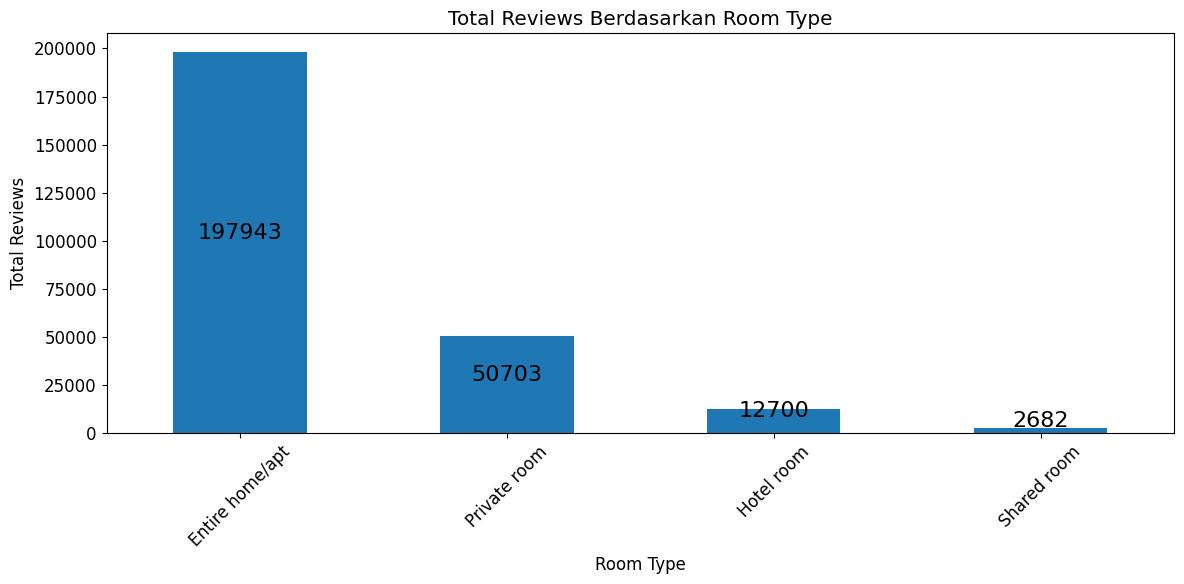

In [35]:
# Menghitung jumlah reviews berdasarkan room type
reviews_by_room_type = df.groupby('room_type')['number_of_reviews'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
reviews_by_room_type.plot(kind='bar')
plt.title('Total Reviews Berdasarkan Room Type')
plt.xlabel('Room Type')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)
# Menambahkan anotasi jumlah listings di setiap bar
for i, v in enumerate(reviews_by_room_type):
    plt.text(i, v / 2, str(v), ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()

### Insight
Tipe kamar **Entire home/apt** menjadi paling popular karena memiliki total reviews terbanyak diantara yang lain yaitu **197943**

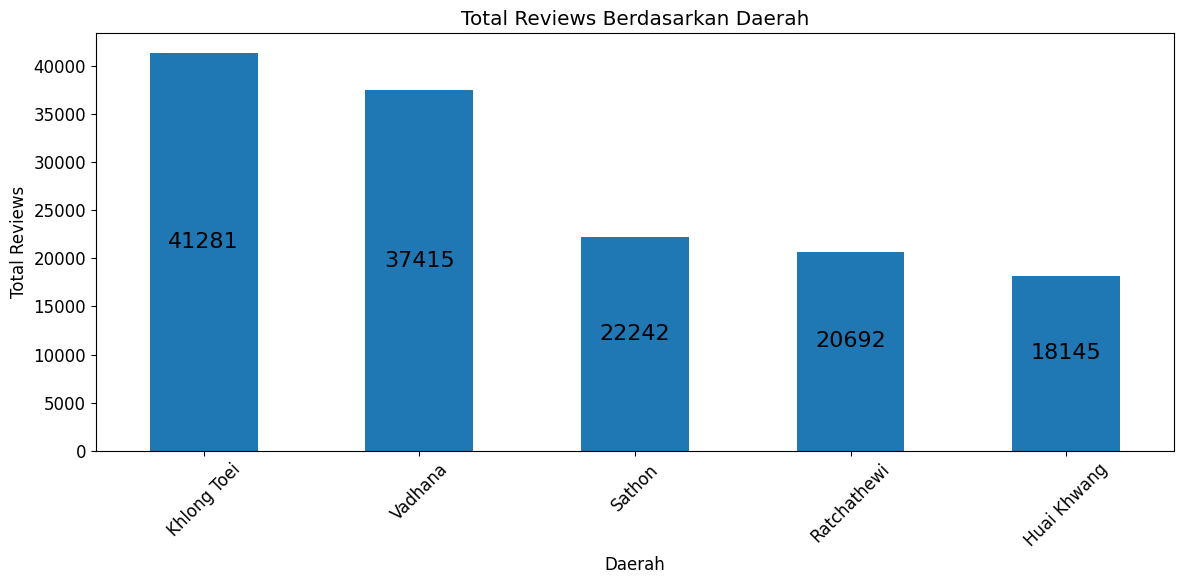

In [36]:
# Menghitung jumlah reviews di setiap daerah
reviews_by_room_type = df.groupby('neighbourhood')['number_of_reviews'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 6))
reviews_by_room_type.plot(kind='bar')
plt.title('Total Reviews Berdasarkan Daerah')
plt.xlabel('Daerah')
plt.ylabel('Total Reviews')
plt.xticks(rotation=45)
# Menambahkan anotasi jumlah listings di setiap bar
for i, v in enumerate(reviews_by_room_type):
    plt.text(i, v / 2, str(v), ha='center', va='bottom', fontsize=16)
plt.tight_layout()
plt.show()

### Insight

Berdasarkan reviews, daerah Khlong Toei memiliki total reviews paling tinggi yaitu **41281** sehingga dikatakan paling populer sedangkan Huai Khwang memiliki total reviews terendah yaitu **18145**.

### Insight terhadap dua grafik diatas
Kedua grafik tersebut dikatakan populer karena memiliki total reviews yang banyak, tetapi dikarenakan pada dataset yang memiliki missing value maka banyak reviews bernilai 0. hal ini mungkin terjadi karena user lupa memberikan reviews terhadap listing/tempat penginapan. Dikarenakan tidak terdapat kolom sentimen terhadap reviews, maka popular ini tidak bisa di identifikasikan baik atau buruk nya reviews terhadap tempat penginapan.

# Kesimpulan (Belum kelar masih generated)

- **Analisis Harga Properti Berdasarkan Lokasi**:

  Analisis harga properti menunjukkan perbedaan harga yang signifikan antar lokasi di Bangkok, yang dapat menjadi acuan bagi pemilik properti dalam menetapkan harga harga tertinggi atau terendah pada wilayah tertentu.

- **Pengaruh Tipe Kamar (Room Type) terhadap Harga**:

Mengetahui harga yang diikatkan pada berbagai tipe kamar dapat membantu pemilik properti dalam menentukan strategi penetapan harga untuk meningkatkan pendapatan.

- **Jumlah Tipe Kamar berdasarkan daerah**:

Untuk memahami macam tipe kamar yang banyak dibangun pada daerah tertentu

- **Jumlah ulasan pada tipe kamar dan listing/tempat**

Mengetahui faktor-faktor yang paling memengaruhi jumlah ulasan untuk meningkatkan popularitas properti.

- Analisis harga properti menunjukkan perbedaan harga yang signifikan antar lokasi di Bangkok, yang dapat menjadi acuan bagi pemilik properti dalam menetapkan harga properti.
- Tipe kamar memiliki pengaruh besar terhadap harga properti. Pemahaman mendalam tentang tipe kamar yang paling diminati dapat membantu dalam penetapan harga yang tepat.
- Distribusi tipe kamar yang beragam di daerah-daerah tertentu menunjukkan variasi opsi akomodasi, yang dapat meningkatkan daya tarik properti di daerah tersebut.
- Memahami korelasi antara ulasan dengan popularitas properti dapat membantu pemilik properti dalam meningkatkan kualitas layanan untuk menarik lebih banyak tamu.

<del>
Jika diasumsikan kolom price tidak terdistribusi normal, kita dapat mengambil beberapa insight dari analisis yang dilakukan:

- Analisis Harga Properti Berdasarkan Lokasi:

  - Perbedaan Harga Antar Lokasi: Terdapat perbedaan signifikan dalam harga properti antar lokasi. Pada beberapa daerah tertentu, harga properti cenderung lebih tinggi daripada daerah lainnya. Median harga properti di setiap lokasi dapat memberikan gambaran yang lebih akurat tentang tingkat harga properti yang umum di setiap daerah.
  - Identifikasi Lokasi Premium: Analisis ini dapat membantu mengidentifikasi lokasi-lokasi premium atau yang memiliki harga properti lebih tinggi dari rata-rata kota tersebut. Ini dapat memberikan wawasan bagi pembeli atau investor yang ingin menargetkan lokasi tertentu.
- Pengaruh Tipe Kamar (Room Type) terhadap Harga:

  - Perbedaan Harga Antar Tipe Kamar: Tipe kamar (misalnya, entire home/apt, private room, hotel room, shared room) memiliki pengaruh yang signifikan terhadap harga properti. Dengan menganalisis median harga untuk setiap tipe kamar di berbagai lokasi, kita dapat melihat perbedaan harga yang ditawarkan oleh masing-masing tipe kamar.
  - Preferensi Pengunjung: Analisis ini juga dapat membantu memahami preferensi pengunjung atau pelanggan tertentu terhadap tipe kamar dan seberapa jauh mereka bersedia membayar untuk berbagai tipe akomodasi.
- Ketersediaan Properti dan Harga:

  - Hubungan Antara Ketersediaan dan Harga: Analisis ketersediaan properti terhadap harga dapat memberikan wawasan tentang bagaimana tingkat ketersediaan (misalnya, jumlah hari dalam setahun properti tersedia) berhubungan dengan harga. Meskipun hubungan kausalitas tidak pasti, namun analisis ini bisa memberikan indikasi tentang bagaimana tingkat permintaan dan penawaran mempengaruhi harga properti.
</del>

<del> 
Rekomendasi:
- Strategi Penetapan Harga yang Diperhitungkan:
  - Sesuaikan harga berdasarkan lokasi dan jenis kamar untuk meningkatkan daya tarik properti.
- Penawaran Kamar yang Diversifikasi:
  - Tawarkan berbagai tipe kamar untuk menjangkau berbagai jenis calon penyewa.
- Optimalkan Ketersediaan Properti:
  - Gunakan analisis ketersediaan properti untuk menyesuaikan harga secara dinamis.

</del>